<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset

df = pd.read_csv('Student_Performance.csv')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.shape

(10000, 6)

In [6]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 10000 rows and 6 columns.


##Data Checks to Perform

*   Check Missing values
*   Check data type
*   Check statistics of dataset
*   Check various categories present in the different categorical column


In [7]:
# checking missing values
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


### There are no any missing values in the dataset

In [10]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
# check statistics
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [72]:
df.describe(include='object')

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


## Study Patterns and Performance Analysis (Summary)

### Hours Studied:
  - Students typically student around 5 hours per day
  - ranges from 1 hr(min) to 9 hrs(max)
  - 50% of students study 5 hours or more

### Previous Scores
  - The average score is 69.4, but the scores varies from 40 to 99.
  - Half of the students score 69 or above  

### Sleep Hours
  - On average, students sleep about 6.5 hours per night.
  - Most students sleep between 4(min) to 9(max) hours.

### Sample Question Papers Practiced
  - On average, students practice around 4.6 sample papers.
  - 50% of students practiced atleast 5 papers.

### Performance Index
  - Students generally perform around 55% on their performance index.
  - The performance varies from 10% to 100%.
  - Half of the student scores 55 or more.     



### Check various categories present in the different categorical column

In [12]:
# Define Numerical and Categorical Columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("\nWe have {} categorical features : {}\n".format(len(categorical_features), categorical_features))

df.head(n=2)

We have 5 numerical features : ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

We have 1 categorical features : ['Extracurricular Activities']



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


## Exploring Data (Visualization)

In [90]:
df_hours_studied = df['Hours Studied'].value_counts().sort_index()
df_hours_studied

,count
Hours Studied,
1,1152
2,1085
3,1119
4,1085
5,1094
6,1133
7,1129
8,1088
9,1115


In [89]:
def add_labels(x, y):
    for k in range(len(x)):
        plt.text(k, y[k], str(y[k]), ha='center', va='bottom')

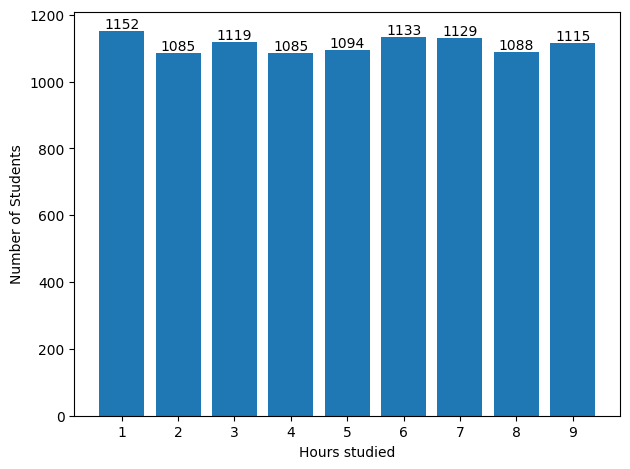

In [91]:
#Create a bar chart
plt.bar(range(len(df_hours_studied.index)),df_hours_studied.values)

add_labels(range(len(df_hours_studied.index)), df_hours_studied.values)

plt.xticks(range(len(df_hours_studied.index)), df_hours_studied.index)

plt.xlabel('Hours studied')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

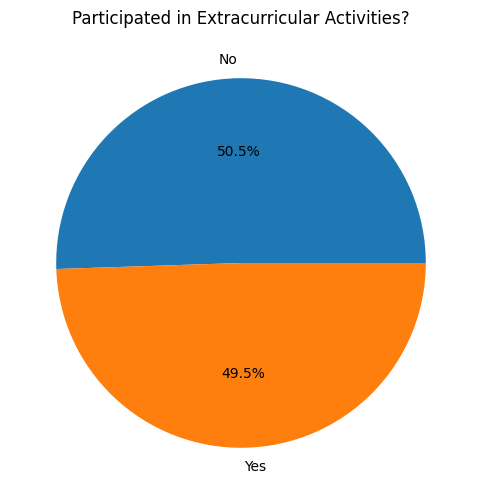

In [73]:
# Extracurricular Activities
extracurricular_df = df['Extracurricular Activities'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
extracurricular_df.plot(kind='pie', autopct='%1.1f%%')
plt.title('Participated in Extracurricular Activities?')
plt.ylabel('')
plt.show()

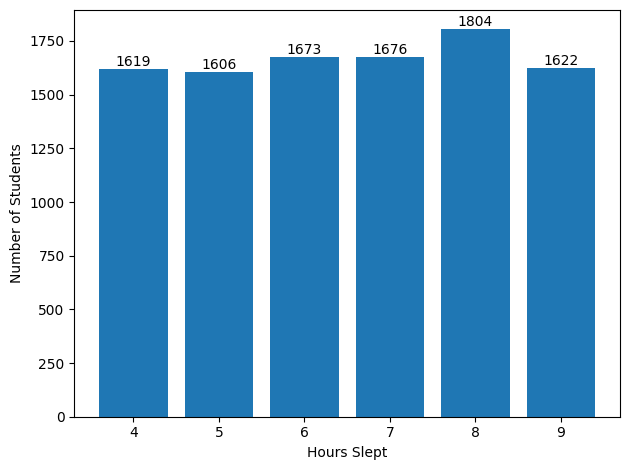

In [93]:
# Sleep Hours
sleep_df = df['Sleep Hours'].value_counts().sort_index()
sleep_df

# Create a bar chart
# Use the range for x-axis to align with labels
plt.bar(range(len(sleep_df.index)), sleep_df.values)
add_labels(range(len(sleep_df.index)), sleep_df.values)
# Correct the x-tick labels to match sleep hours
plt.xticks(range(len(sleep_df.index)), sleep_df.index)
plt.xlabel('Hours Slept')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

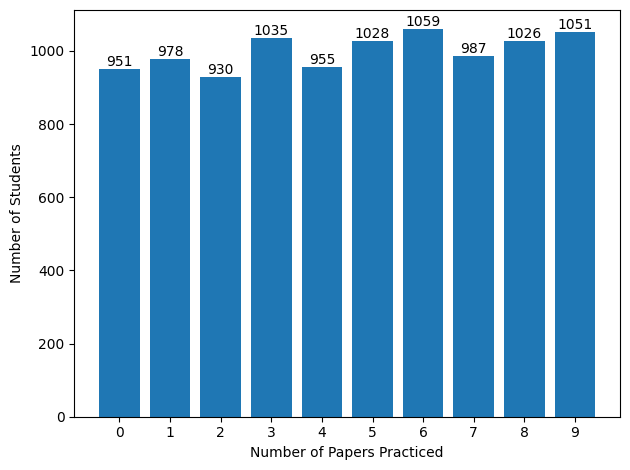

In [95]:
# Sample Question Papers Practiced
sample_question_df = df['Sample Question Papers Practiced'].value_counts().sort_index()

# create bar chart
plt.bar(range(len(sample_question_df.index)),sample_question_df.values)
add_labels(range(len(sample_question_df.index)), sample_question_df.values)

plt.xticks(range(len(sample_question_df.index)),sample_question_df.index)
plt.xlabel('Number of Papers Practiced')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()